In [132]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [36]:
df = pd.read_csv('Resources/postgres.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [37]:
target = df["stroke"]
target_names = ["condition", "stroke"]

In [38]:
data = df.drop(["stroke","gender","ever_married","work_type","Residence_type","smoking_status"], axis=1)
feature_names = data.columns
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.6
1,80.0,0,1,105.92,32.5
2,49.0,0,0,171.23,34.4
3,79.0,1,0,174.12,24.0
4,81.0,0,0,186.21,29.0


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [44]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [45]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.949


In [46]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

   condition       0.95      1.00      0.97      1164
      stroke       0.00      0.00      0.00        63

    accuracy                           0.95      1227
   macro avg       0.47      0.50      0.49      1227
weighted avg       0.90      0.95      0.92      1227



C:\Users\marcus garnham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marcus garnham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marcus garnham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='poly')
model.fit(X_train, y_train)

SVC(kernel='poly')

In [48]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.949


In [49]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

   condition       0.95      1.00      0.97      1164
      stroke       0.00      0.00      0.00        63

    accuracy                           0.95      1227
   macro avg       0.47      0.50      0.49      1227
weighted avg       0.90      0.95      0.92      1227



C:\Users\marcus garnham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marcus garnham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marcus garnham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='sigmoid')
model.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [54]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.948


In [55]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

   condition       0.95      1.00      0.97      1164
      stroke       0.00      0.00      0.00        63

    accuracy                           0.95      1227
   macro avg       0.47      0.50      0.49      1227
weighted avg       0.90      0.95      0.92      1227



# undersampling 

In [82]:
strokes = len(df[df['stroke'] == 1])
print(strokes)

209


In [97]:
df_strokes = df[df['stroke'] == 1 ]
df_strokes

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
204,Female,68.0,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1
205,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
206,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
207,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1


In [76]:
#no_strokes = df[df.stroke == 0].index
#print(no_strokes)
no_strokes = df[df['stroke'] == 0 ]
no_strokes

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
209,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
210,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
211,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
212,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
213,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
4903,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4904,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4905,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4906,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [94]:
no_strokes_2 = no_strokes.sample(n=strokes, replace=False)
no_strokes_2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
599,Male,53.0,0,0,Yes,Self-employed,Urban,76.36,29.8,Unknown,0
4623,Female,54.0,1,0,No,Govt_job,Urban,182.22,32.6,formerly smoked,0
478,Female,38.0,0,0,Yes,Govt_job,Urban,70.92,41.6,never smoked,0
3984,Female,72.0,0,1,Yes,Self-employed,Urban,142.63,32.9,smokes,0
1323,Female,14.0,0,0,No,children,Urban,91.85,27.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
1481,Male,63.0,0,0,Yes,Private,Rural,98.46,30.6,never smoked,0
1304,Female,32.0,0,0,No,Self-employed,Rural,93.17,27.5,smokes,0
2348,Female,26.0,0,0,No,Private,Urban,89.28,21.7,smokes,0
4624,Female,51.0,0,0,Yes,Self-employed,Urban,67.26,33.1,formerly smoked,0


In [98]:
Undersample_concat = pd.concat([no_strokes_2, df_strokes])
Undersample_concat

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
599,Male,53.0,0,0,Yes,Self-employed,Urban,76.36,29.8,Unknown,0
4623,Female,54.0,1,0,No,Govt_job,Urban,182.22,32.6,formerly smoked,0
478,Female,38.0,0,0,Yes,Govt_job,Urban,70.92,41.6,never smoked,0
3984,Female,72.0,0,1,Yes,Self-employed,Urban,142.63,32.9,smokes,0
1323,Female,14.0,0,0,No,children,Urban,91.85,27.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
204,Female,68.0,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1
205,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
206,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
207,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1


In [134]:
target2 = Undersample_concat["stroke"]
target_names2 = ["condition", "stroke"]

In [135]:
data2 = Undersample_concat.drop(["stroke","gender","ever_married","work_type","Residence_type","smoking_status"], axis=1)
feature_names2 = data2.columns
data2

,age,hypertension,heart_disease,avg_glucose_level,bmi
599,53.0,0,0,76.36,29.8
4623,54.0,1,0,182.22,32.6
478,38.0,0,0,70.92,41.6
3984,72.0,0,1,142.63,32.9
1323,14.0,0,0,91.85,27.8
...,...,...,...,...,...
204,68.0,1,1,247.51,40.5
205,57.0,0,0,84.96,36.7
206,14.0,0,0,57.93,30.9
207,75.0,0,0,78.80,29.3


In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data2, target2, random_state=42)

In [137]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [138]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.724


In [139]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

   condition       0.83      0.57      0.67        53
      stroke       0.67      0.88      0.76        52

    accuracy                           0.72       105
   macro avg       0.75      0.73      0.72       105
weighted avg       0.75      0.72      0.72       105



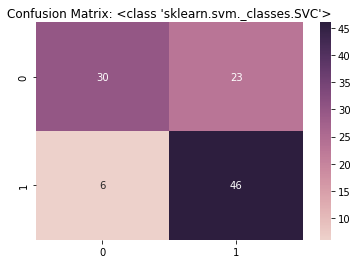

In [140]:
cf_matrix = confusion_matrix(y_test, model.predict(X_test))
plt.title('Confusion Matrix: {}'.format(SVC))
sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
plt.show()
#dont reduce to much
#printed format with 4 numbers
#confusion matrix for training and end result

In [141]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='poly')
model.fit(X_train, y_train)

SVC(kernel='poly')

In [142]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.752


In [143]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

   condition       0.81      0.66      0.73        53
      stroke       0.71      0.85      0.77        52

    accuracy                           0.75       105
   macro avg       0.76      0.75      0.75       105
weighted avg       0.76      0.75      0.75       105



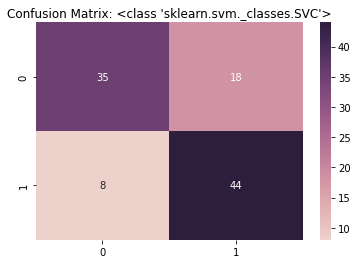

In [144]:
cf_matrix = confusion_matrix(y_test, model.predict(X_test))
plt.title('Confusion Matrix: {}'.format(SVC))
sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
plt.show()

In [145]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='sigmoid')
model.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [146]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.371


In [147]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

   condition       0.40      0.51      0.45        53
      stroke       0.32      0.23      0.27        52

    accuracy                           0.37       105
   macro avg       0.36      0.37      0.36       105
weighted avg       0.36      0.37      0.36       105



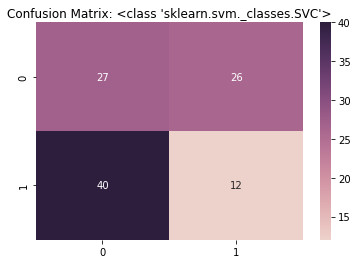

In [148]:
cf_matrix = confusion_matrix(y_test, model.predict(X_test))
plt.title('Confusion Matrix: {}'.format(SVC))
sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
plt.show()